In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Load the dataset
df = pd.read_csv('wppool_growth_data_sample_20k.csv')
df.head()




,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,6/29/2023,7/12/2023,Free,UK,3,15,1,1,13,NaN,NaN,0,1
1,2,4/10/2023,7/25/2023,Free,India,133,665,0,1,106,NaN,NaN,0,0
2,3,10/25/2023,12/7/2023,Free,USA,53,106,0,1,43,NaN,NaN,0,0
3,4,8/26/2023,11/9/2023,Pro,Canada,242,242,0,1,75,11/9/2023,Basic,49,0
4,5,5/14/2023,11/22/2023,Free,UK,12,48,0,1,192,NaN,NaN,0,0


In [11]:
# Step 1: Reduce Churn
# a. Identify at-risk users (low engagement)
at_risk_users = df[(df['days_active'] < 20) & (df['total_sessions'] < 20) & (df['churned'] == 0)]
print("At-risk users (low engagement):")
print(at_risk_users[['user_id', 'days_active', 'total_sessions', 'subscription_type']].head())



At-risk users (low engagement):
Empty DataFrame
Columns: [user_id, days_active, total_sessions, subscription_type]
Index: []


In [3]:
# b. Highlight users with low activation rates
low_activation_users = df[(df['activation_status'] == 0) & (df['churned'] == 0)]
print("\nUsers with low activation rates:")
print(low_activation_users[['user_id', 'activation_status', 'subscription_type']].head())




Users with low activation rates:
     user_id  activation_status subscription_type
202      203                  0              Free
604      605                  0              Free
656      657                  0              Free
711      712                  0              Free
731      732                  0              Free


In [4]:
# c. Pro-specific retention strategies
pro_users = df[df['subscription_type'] == 'Pro']
print("\nPro users for retention strategies:")
print(pro_users[['user_id', 'plan_type', 'monthly_revenue']].head())




Pro users for retention strategies:
    user_id plan_type  monthly_revenue
3         4     Basic               49
14       15  Standard               99
15       16  Standard               49
18       19  Standard               99
25       26     Basic               99


In [5]:
# Step 2: Increase Free-to-Pro Conversions
# a. Identify users who clicked "Download Pro" but did not upgrade
potential_upgrades = df[(df['download_clicks'] == 1) & (df['subscription_type'] == 'Free')]
print("\nUsers who clicked 'Download Pro' but did not upgrade:")
print(potential_upgrades[['user_id', 'download_clicks', 'subscription_type']].head())




Users who clicked 'Download Pro' but did not upgrade:
    user_id  download_clicks subscription_type
0         1                1              Free
33       34                1              Free
35       36                1              Free
36       37                1              Free
56       57                1              Free


In [7]:
# b. Optimize the upgrade funnel by analyzing barriers
barrier_analysis = df[(df['subscription_type'] == 'Free') & (df['download_clicks'] == 1)]
print("\nBarrier analysis for Free users who clicked 'Download Pro':")
print(barrier_analysis[['user_id', 'total_sessions', 'page_views', 'activation_status']].head())




Barrier analysis for Free users who clicked 'Download Pro':
    user_id  total_sessions  page_views  activation_status
0         1               3          15                  1
33       34              53         159                  1
35       36              58         116                  1
36       37              12          12                  1
56       57              26         104                  1


In [8]:
# Step 3: Market Expansion Opportunities
# a. Identify high-engagement countries
high_engagement_countries = df.groupby('country')['total_sessions'].sum().nlargest(5)
print("\nTop 5 high-engagement countries:")
print(high_engagement_countries)




Top 5 high-engagement countries:
country
India      272202
Germany    266319
Canada     264217
USA        261635
France     259495
Name: total_sessions, dtype: int64


In [9]:
# b. Identify underpenetrated markets
underpenetrated_markets = df.groupby('country')['total_sessions'].sum().nsmallest(5)
print("\nTop 5 underpenetrated markets:")
print(underpenetrated_markets)


Top 5 underpenetrated markets:
country
Australia    255270
UK           259152
France       259495
USA          261635
Canada       264217
Name: total_sessions, dtype: int64


In [ ]:




# Filter Pro users who have churned
churned_pro_users = df[(df['subscription_type'] == 'Pro') & (df['churned'] == 1)]

# Group by plan type and count the number of churned users
churned_by_plan = churned_pro_users.groupby('plan_type').size().reset_index(name='count')

# Create a pie chart
fig = px.pie(churned_by_plan, values='count', names='plan_type', 
             title='Ratio of Churned Pro Users by Plan Type',
             hover_data=['count'], labels={'count': 'Number of Churned Users'})

# Add percentage labels as text
fig.update_traces(textposition='inside', textinfo='percent+label')

# Show the chart
fig.show()

KeyError: 0

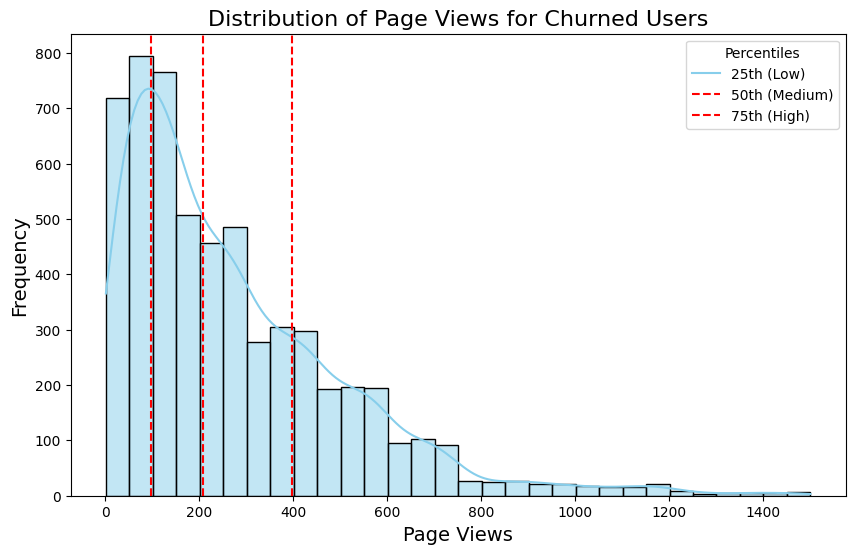

In [9]:



# Filter churned users
churned_users = df[df['churned'] == 1]

# Plot the distribution of page views for churned users
plt.figure(figsize=(10, 6))
sns.histplot(churned_users['page_views'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Page Views for Churned Users', fontsize=16)
plt.xlabel('Page Views', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add vertical lines for percentiles (25th, 50th, 75th)
percentiles = churned_users['page_views'].quantile([0.25, 0.5, 0.75])
for p in percentiles:
    plt.axvline(p, color='red', linestyle='--', linewidth=1.5, label=f'{int(p)} Page Views')

# Add legend
plt.legend(title='Percentiles', labels=['25th (Low)', '50th (Medium)', '75th (High)'])

# Add annotations for categorization
plt.text(percentiles[0] - 10, plt.ylim()[1] * 0.8, 'Low Engagement', fontsize=12, color='red')
plt.text(percentiles[1] - 10, plt.ylim()[1] * 0.7, 'Medium Engagement', fontsize=12, color='red')
plt.text(percentiles[2] - 10, plt.ylim()[1] * 0.6, 'High Engagement', fontsize=12, color='red')

# Show the plot
plt.show()

C:\Users\Sajid\AppData\Local\Temp\ipykernel_10104\1131883930.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



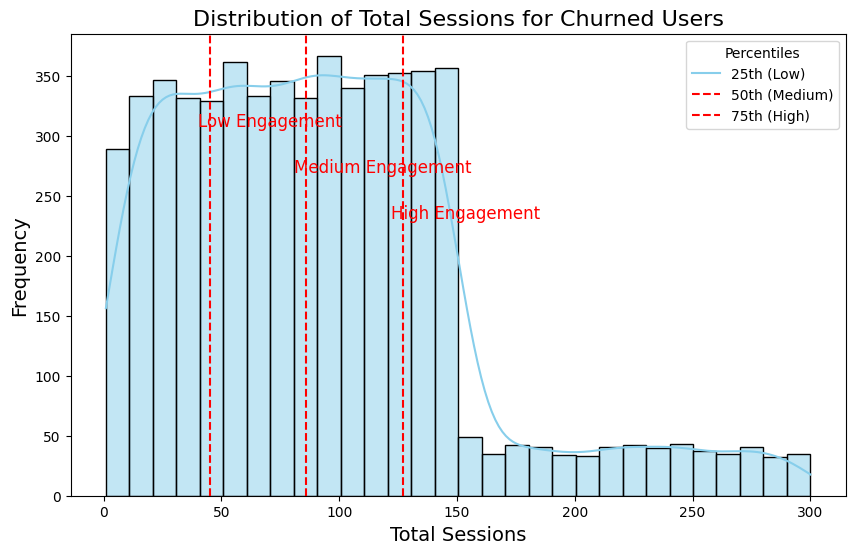

Engagement Category Counts:
engagement_category
Medium Engagement    2857
Low Engagement       1450
High Engagement      1398
Name: count, dtype: int64


In [15]:


# Filter churned users
churned_users = df[df['churned'] == 1]

# Calculate percentiles for total sessions
percentiles = churned_users['total_sessions'].quantile([0.25, 0.5, 0.75])

# Categorize users based on total sessions
churned_users['engagement_category'] = pd.cut(
    churned_users['total_sessions'],
    bins=[0, percentiles[0.25], percentiles[0.75], float('inf')],
    labels=['Low Engagement', 'Medium Engagement', 'High Engagement']
)

# Plot the distribution of total sessions for churned users
plt.figure(figsize=(10, 6))
sns.histplot(churned_users['total_sessions'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Total Sessions for Churned Users', fontsize=16)
plt.xlabel('Total Sessions', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add vertical lines for percentiles (25th, 50th, 75th)
for p in percentiles:
    plt.axvline(p, color='red', linestyle='--', linewidth=1.5, label=f'{int(p)} Sessions')

# Add legend
plt.legend(title='Percentiles', labels=['25th (Low)', '50th (Medium)', '75th (High)'])

# Add annotations for categorization
plt.text(percentiles[0.25] - 5, plt.ylim()[1] * 0.8, 'Low Engagement', fontsize=12, color='red')
plt.text(percentiles[0.5] - 5, plt.ylim()[1] * 0.7, 'Medium Engagement', fontsize=12, color='red')
plt.text(percentiles[0.75] - 5, plt.ylim()[1] * 0.6, 'High Engagement', fontsize=12, color='red')

# Show the plot
plt.show()

# Display the count of users in each category
print("Engagement Category Counts:")
print(churned_users['engagement_category'].value_counts())

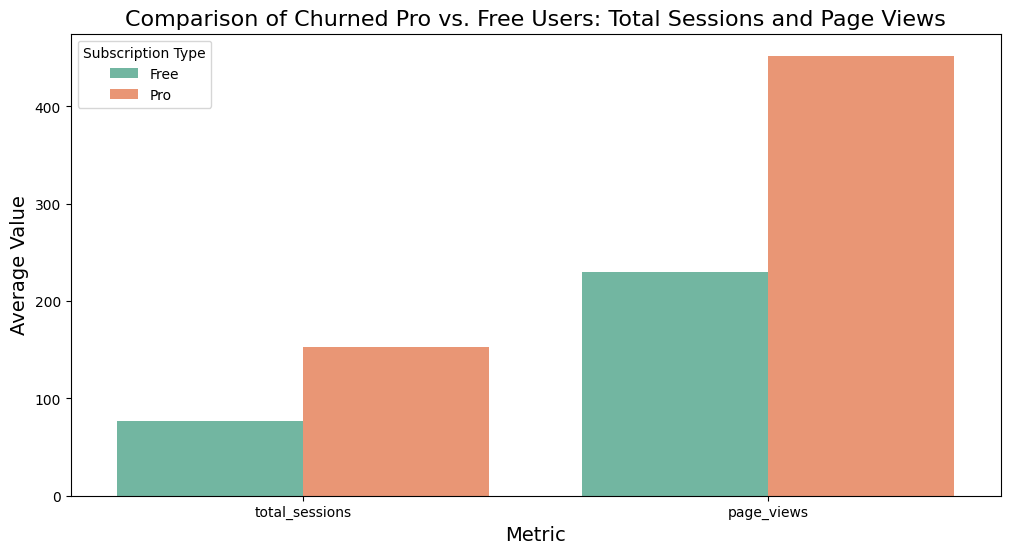

C:\Users\Sajid\AppData\Local\Temp\ipykernel_10104\4036599113.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Sajid\AppData\Local\Temp\ipykernel_10104\4036599113.py:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




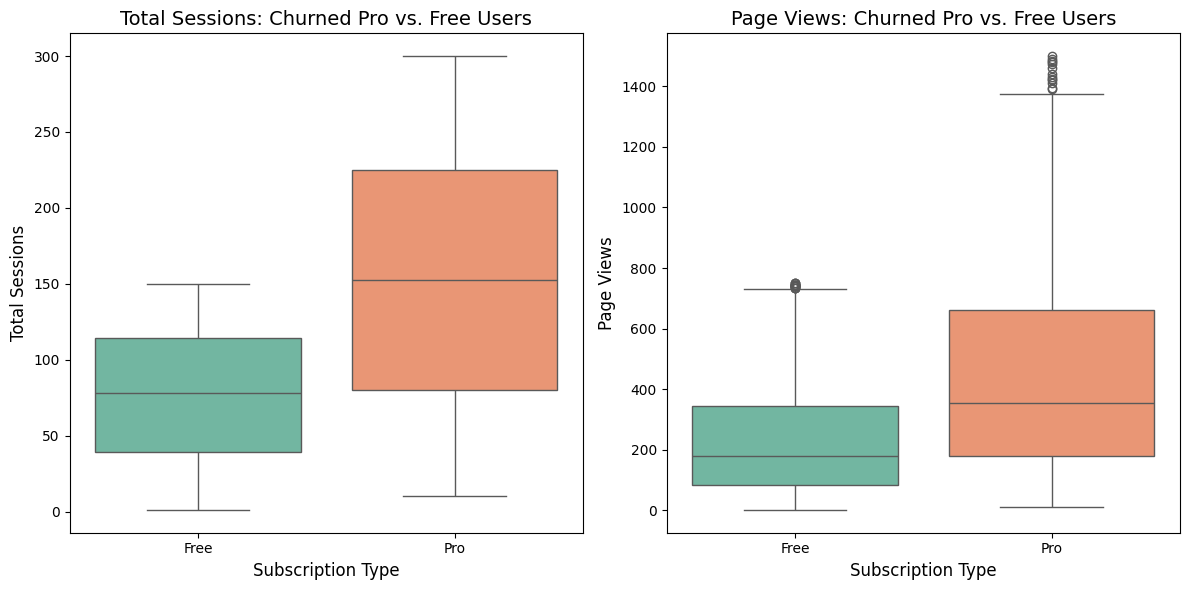

In [16]:


# Filter churned users
churned_users = df[df['churned'] == 1]

# Grouped Bar Chart: Compare average total_sessions and page_views for churned Pro vs. Free users
grouped_data = churned_users.groupby('subscription_type')[['total_sessions', 'page_views']].mean().reset_index()

# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(grouped_data, id_vars='subscription_type', value_vars=['total_sessions', 'page_views'],
                      var_name='metric', value_name='average_value')

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='metric', y='average_value', hue='subscription_type', data=melted_data, palette='Set2')
plt.title('Comparison of Churned Pro vs. Free Users: Total Sessions and Page Views', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Average Value', fontsize=14)
plt.legend(title='Subscription Type')
plt.show()

# Side-by-Side Box Plots: Compare distributions of total_sessions and page_views for churned Pro vs. Free users
plt.figure(figsize=(12, 6))

# Box plot for total_sessions
plt.subplot(1, 2, 1)
sns.boxplot(x='subscription_type', y='total_sessions', data=churned_users, palette='Set2')
plt.title('Total Sessions: Churned Pro vs. Free Users', fontsize=14)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Total Sessions', fontsize=12)

# Box plot for page_views
plt.subplot(1, 2, 2)
sns.boxplot(x='subscription_type', y='page_views', data=churned_users, palette='Set2')
plt.title('Page Views: Churned Pro vs. Free Users', fontsize=14)
plt.xlabel('Subscription Type', fontsize=12)
plt.ylabel('Page Views', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Sajid\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\

Cluster Summary (Mean Values):
         total_sessions  page_views  days_active
cluster                                         
0             64.194795  161.845398    46.869687
1            170.010359  600.024524    74.540169
2             75.203269  206.111542   201.586925


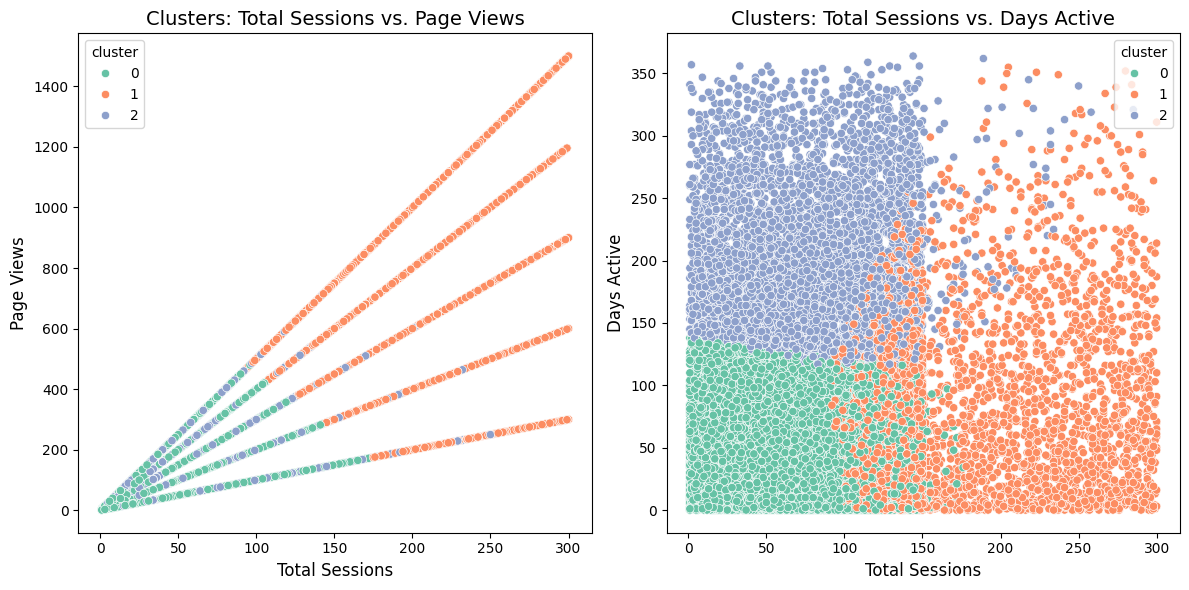


Free Users in Pro-Like Cluster (Potential for Conversion):
    user_id  total_sessions  page_views  days_active
1         2             133         665          106
23       24             147         441           57
26       27             137         548          190
34       35             132         528           58
44       45             141         564           55


In [17]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



# Select relevant features for clustering
features = ['total_sessions', 'page_views', 'days_active']
X = df[features]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters as needed
df['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze clusters
cluster_summary = df.groupby('cluster')[features].mean()
print("Cluster Summary (Mean Values):")
print(cluster_summary)

# Visualize clusters
plt.figure(figsize=(12, 6))

# Scatter plot: total_sessions vs. page_views, colored by cluster
plt.subplot(1, 2, 1)
sns.scatterplot(x='total_sessions', y='page_views', hue='cluster', data=df, palette='Set2')
plt.title('Clusters: Total Sessions vs. Page Views', fontsize=14)
plt.xlabel('Total Sessions', fontsize=12)
plt.ylabel('Page Views', fontsize=12)

# Scatter plot: total_sessions vs. days_active, colored by cluster
plt.subplot(1, 2, 2)
sns.scatterplot(x='total_sessions', y='days_active', hue='cluster', data=df, palette='Set2')
plt.title('Clusters: Total Sessions vs. Days Active', fontsize=14)
plt.xlabel('Total Sessions', fontsize=12)
plt.ylabel('Days Active', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Identify Free users in clusters with high engagement (similar to Pro users)
pro_cluster = df[df['subscription_type'] == 'Pro']['cluster'].mode()[0]  # Most common cluster for Pro users
free_users_in_pro_cluster = df[(df['subscription_type'] == 'Free') & (df['cluster'] == pro_cluster)]

print("\nFree Users in Pro-Like Cluster (Potential for Conversion):")
print(free_users_in_pro_cluster[['user_id', 'total_sessions', 'page_views', 'days_active']].head())

C:\Users\Sajid\AppData\Local\Temp\ipykernel_10104\2572203305.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




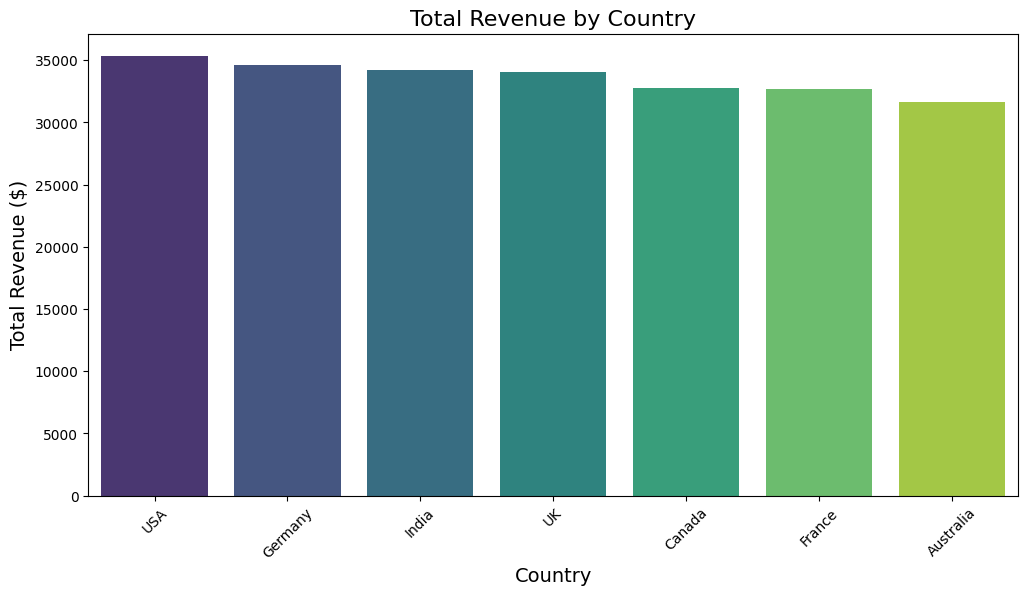

C:\Users\Sajid\AppData\Local\Temp\ipykernel_10104\2572203305.py:34: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




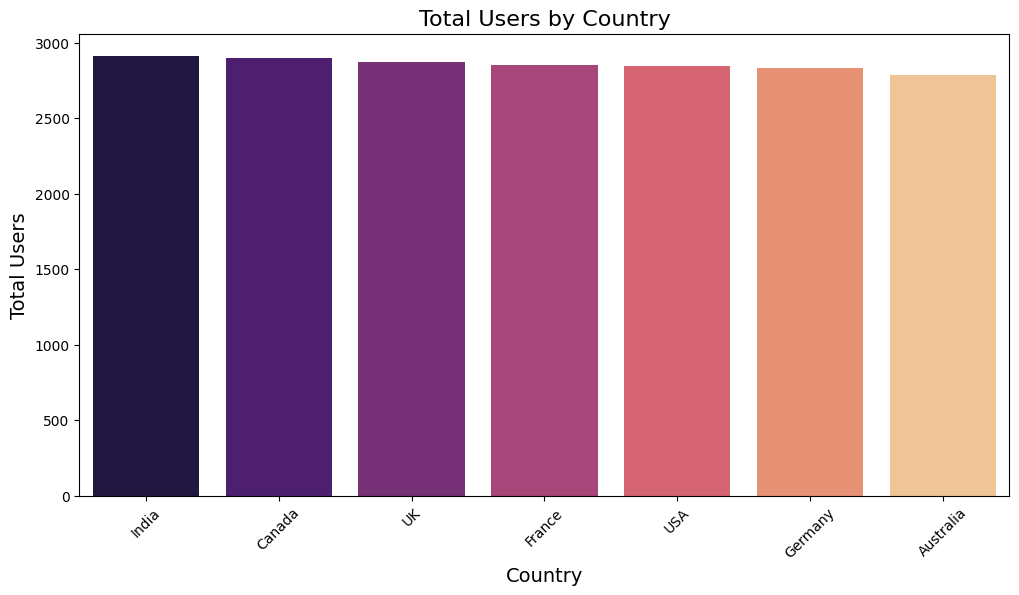

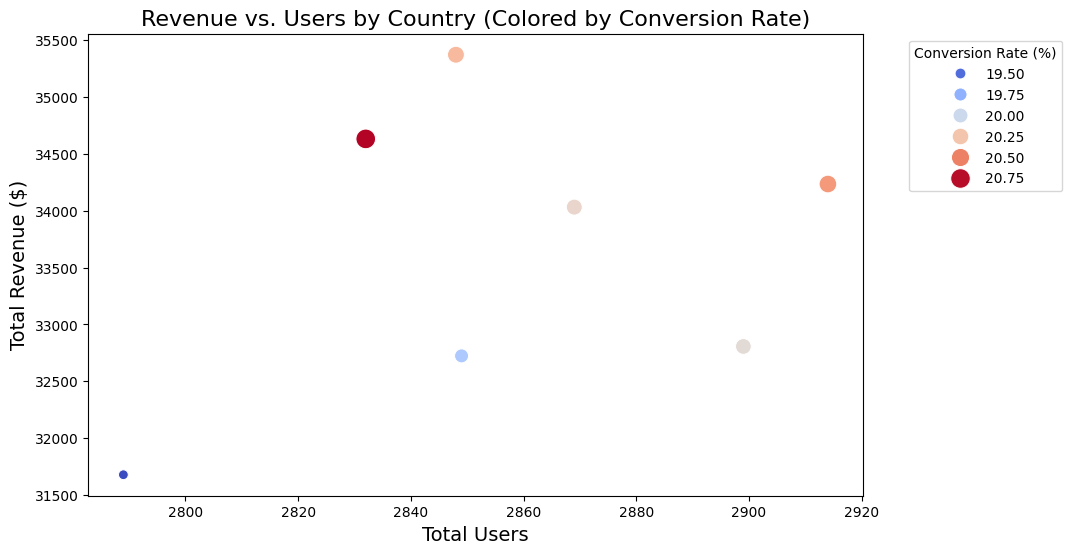

High-Potential Countries for Expansion:
  country  total_users  total_revenue  conversion_rate
4   India         2914          34235        20.418668


In [18]:


# Step 1: Analyze country trends
country_analysis = df.groupby('country').agg(
    total_users=('user_id', 'nunique'),
    total_revenue=('monthly_revenue', 'sum'),
    conversion_rate=('subscription_type', lambda x: (x == 'Pro').mean() * 100)
).reset_index()

# Step 2: Segment countries based on revenue and user count
# Define segments based on percentiles
country_analysis['revenue_segment'] = pd.cut(
    country_analysis['total_revenue'],
    bins=[0, country_analysis['total_revenue'].quantile(0.33), country_analysis['total_revenue'].quantile(0.66), float('inf')],
    labels=['Low Revenue', 'Medium Revenue', 'High Revenue']
)

country_analysis['user_segment'] = pd.cut(
    country_analysis['total_users'],
    bins=[0, country_analysis['total_users'].quantile(0.33), country_analysis['total_users'].quantile(0.66), float('inf')],
    labels=['Low Users', 'Medium Users', 'High Users']
)

# Step 3: Visualize country segments
# Bar plot: Total Revenue by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_revenue', data=country_analysis.sort_values('total_revenue', ascending=False), palette='viridis')
plt.title('Total Revenue by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Bar plot: Total Users by Country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_users', data=country_analysis.sort_values('total_users', ascending=False), palette='magma')
plt.title('Total Users by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Users', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Scatter plot: Revenue vs. Users, colored by Conversion Rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_users', y='total_revenue', hue='conversion_rate', size='conversion_rate', data=country_analysis, palette='coolwarm', sizes=(50, 200))
plt.title('Revenue vs. Users by Country (Colored by Conversion Rate)', fontsize=16)
plt.xlabel('Total Users', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.legend(title='Conversion Rate (%)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 4: Identify high-potential countries
high_potential_countries = country_analysis[
    (country_analysis['revenue_segment'] == 'High Revenue') &
    (country_analysis['user_segment'] == 'High Users')
]

print("High-Potential Countries for Expansion:")
print(high_potential_countries[['country', 'total_users', 'total_revenue', 'conversion_rate']])

Top 5 High-Engagement Countries:
   country  total_sessions  days_active
0    India          272202       269647
1  Germany          266319       259428
2   Canada          264217       259700
3      USA          261635       261495
4   France          259495       263561


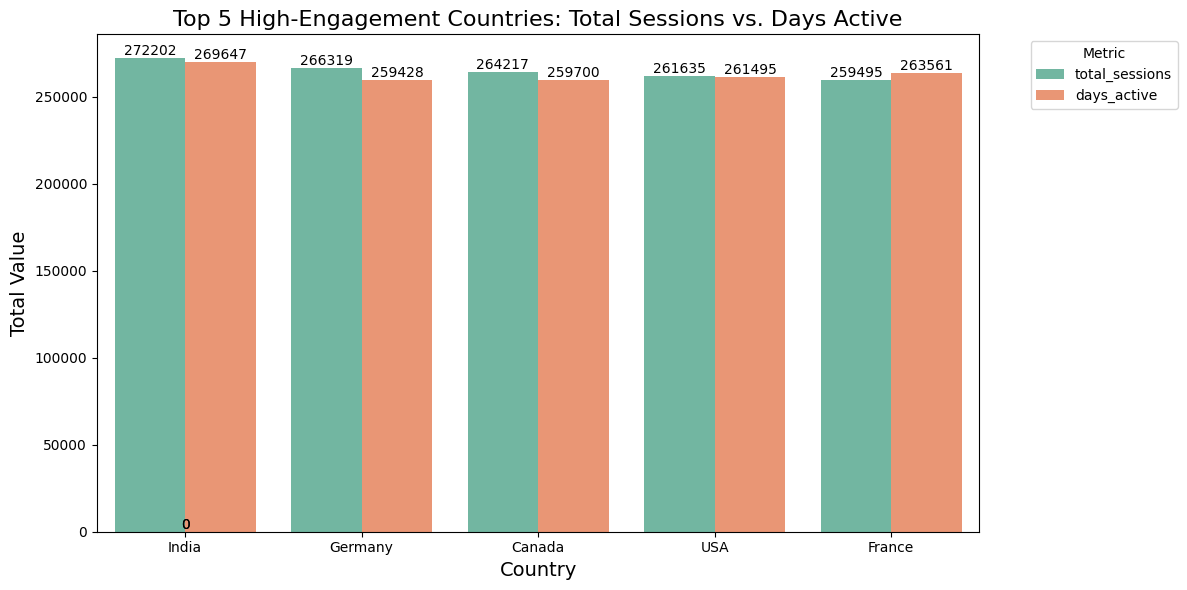

In [8]:


# Step 1: Identify high-engagement countries based on total_sessions
high_engagement_countries = df.groupby('country').agg(
    total_sessions=('total_sessions', 'sum'),
    days_active=('days_active', 'sum')
).nlargest(5, 'total_sessions').reset_index()

print("Top 5 High-Engagement Countries:")
print(high_engagement_countries)

# Step 2: Visualize high-engagement countries
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(high_engagement_countries, id_vars='country', value_vars=['total_sessions', 'days_active'],
                      var_name='metric', value_name='value')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='value', hue='metric', data=melted_data, palette='Set2')
plt.title('Top 5 High-Engagement Countries: Total Sessions vs. Days Active', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

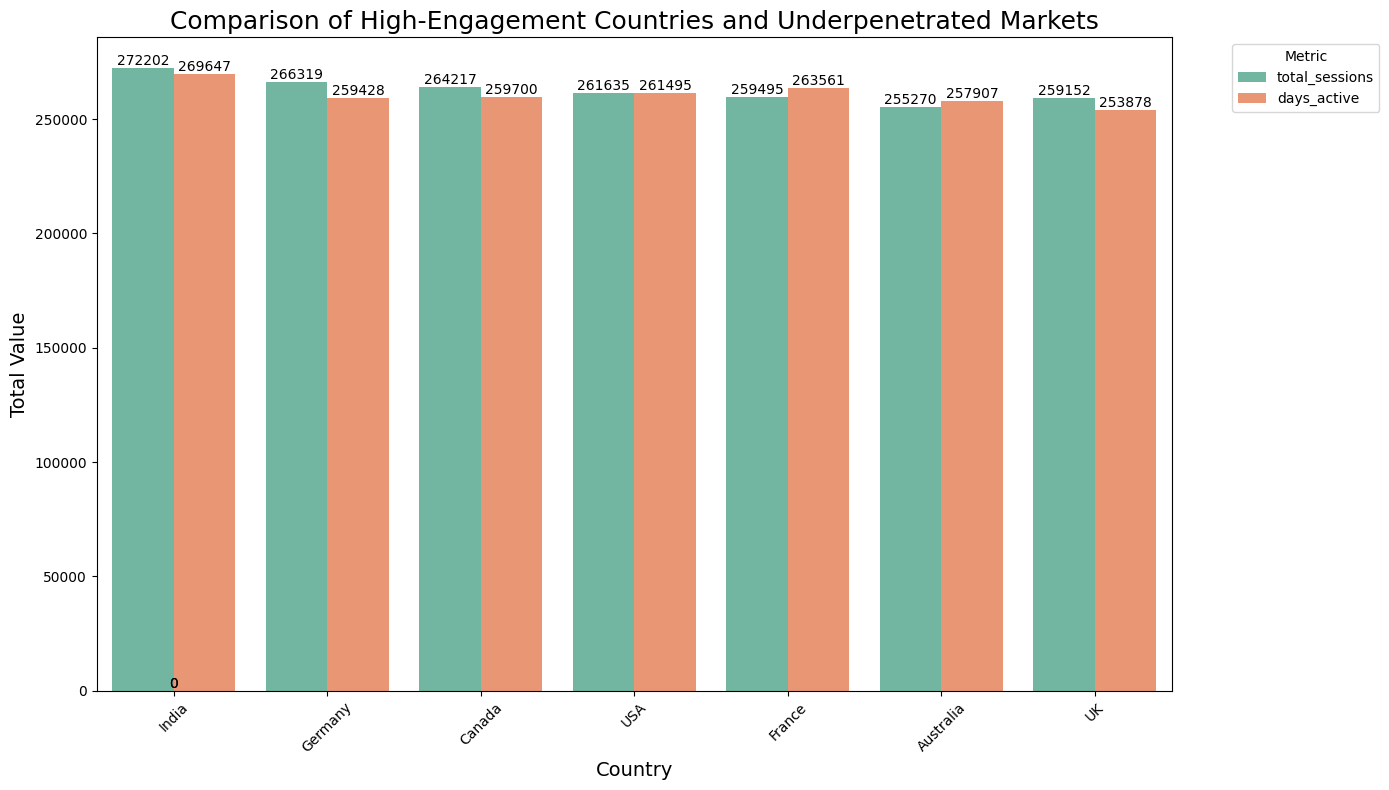

In [11]:


# Step 1: Identify high-engagement countries
high_engagement_countries = df.groupby('country').agg(
    total_sessions=('total_sessions', 'sum'),
    days_active=('days_active', 'sum')
).nlargest(5, 'total_sessions').reset_index()
high_engagement_countries['market_type'] = 'High Engagement'  # Add a label for high-engagement markets

# Step 2: Identify underpenetrated markets
underpenetrated_markets = df.groupby('country').agg(
    total_sessions=('total_sessions', 'sum'),
    days_active=('days_active', 'sum')
).nsmallest(5, 'total_sessions').reset_index()
underpenetrated_markets['market_type'] = 'Underpenetrated'  # Add a label for underpenetrated markets

# Step 3: Combine the data for comparison
combined_data = pd.concat([high_engagement_countries, underpenetrated_markets])

# Step 4: Visualize the comparison
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(combined_data, id_vars=['country', 'market_type'], value_vars=['total_sessions', 'days_active'],
                      var_name='metric', value_name='value')

# Create a grouped bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='country', y='value', hue='metric', data=melted_data, palette='Set2')
plt.title('Comparison of High-Engagement Countries and Underpenetrated Markets', fontsize=18)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust layout and display
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 5 Underpenetrated Markets:
     country  total_sessions  days_active
0  Australia          255270       257907
1         UK          259152       253878
2     France          259495       263561
3        USA          261635       261495
4     Canada          264217       259700


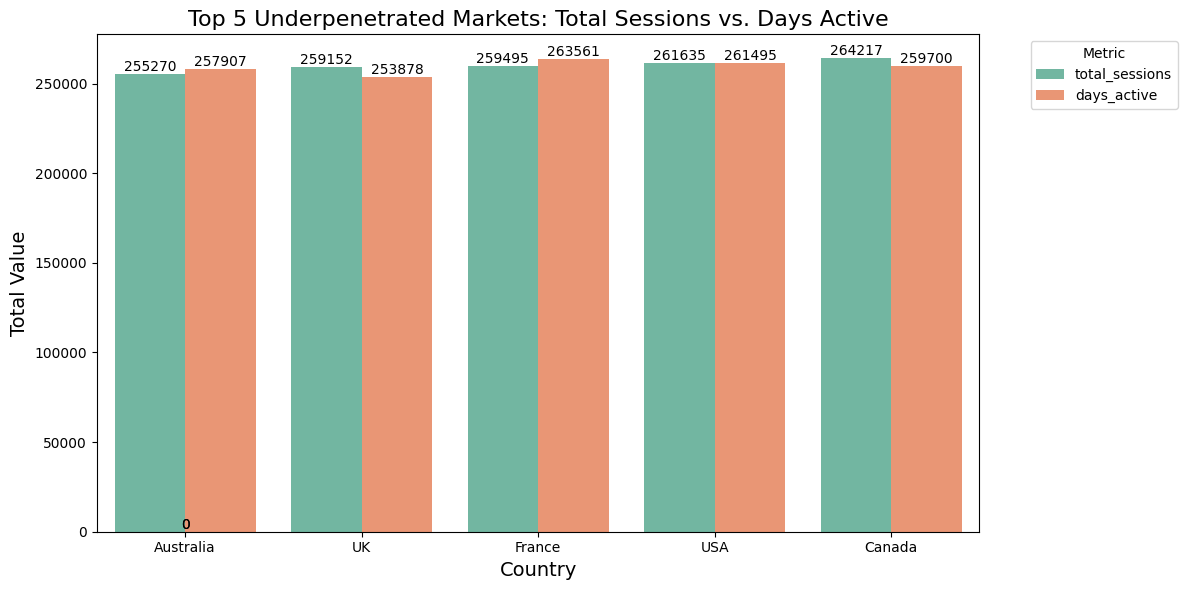

In [10]:


# Step 1: Identify underpenetrated markets based on total_sessions
underpenetrated_markets = df.groupby('country').agg(
    total_sessions=('total_sessions', 'sum'),
    days_active=('days_active', 'sum')
).nsmallest(5, 'total_sessions').reset_index()

print("Top 5 Underpenetrated Markets:")
print(underpenetrated_markets)

# Step 2: Visualize underpenetrated markets
# Melt the data for easier plotting with Seaborn
melted_data = pd.melt(underpenetrated_markets, id_vars='country', value_vars=['total_sessions', 'days_active'],
                      var_name='metric', value_name='value')

# Create a grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='value', hue='metric', data=melted_data, palette='Set2')
plt.title('Top 5 Underpenetrated Markets: Total Sessions vs. Days Active', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Value', fontsize=14)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add annotations
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()